<a href="https://colab.research.google.com/github/nikhil-1e9/LLM-Chatbot/blob/main/mini_LLM_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making my own chatGPT

## Instruction-following models or Instruct models
Language models are machine learning models that can predict word probability based on the sentence’s prior words. If we ask the model for the next word and feed it back to the model regressively to ask for more, the model is doing text generation.

Text generation model is the idea behind many large language models such as GPT3. Instruction-following models, however, are fine-tuned text generation models that learn about dialog and instructions. It is operated as a conversation between two people, and when one finishes a sentence, another person responds accordingly.

Therefore, a text generation model can help you finish a paragraph with a leading sentence. But an instruction following model can answer your questions or respond as requested.

It doesn’t mean you cannot use a text generation model to build a chatbot. But you should find a better quality result with an instruction-following model, which is fine-tuned for such use.

We will be downloading our model from **Hugging Face**.

## Picking the right model

There are several technical criteria to pick your model:

- **What the model was trained on**: Specifically, that means which language the model can speak. A model trained with English text from novels probably is not helpful for a German chatbot for Physics.
- **What is the deep learning library it uses**: Usually models in Hugging Face are built with TensorFlow, PyTorch, and Flax. Not all models have a version for all libraries. You need to make sure you have that specific library installed before you can run a model with transformers.
- **What resources the model needs**: The model can be enormous. Often it would require a GPU to run. But some model needs a very high-end GPU or even multiple high-end GPUs. You need to verify if your resources can support the model inference.

The model I will be using is taken from here: https://huggingface.co/tiiuae/falcon-7b-instruct

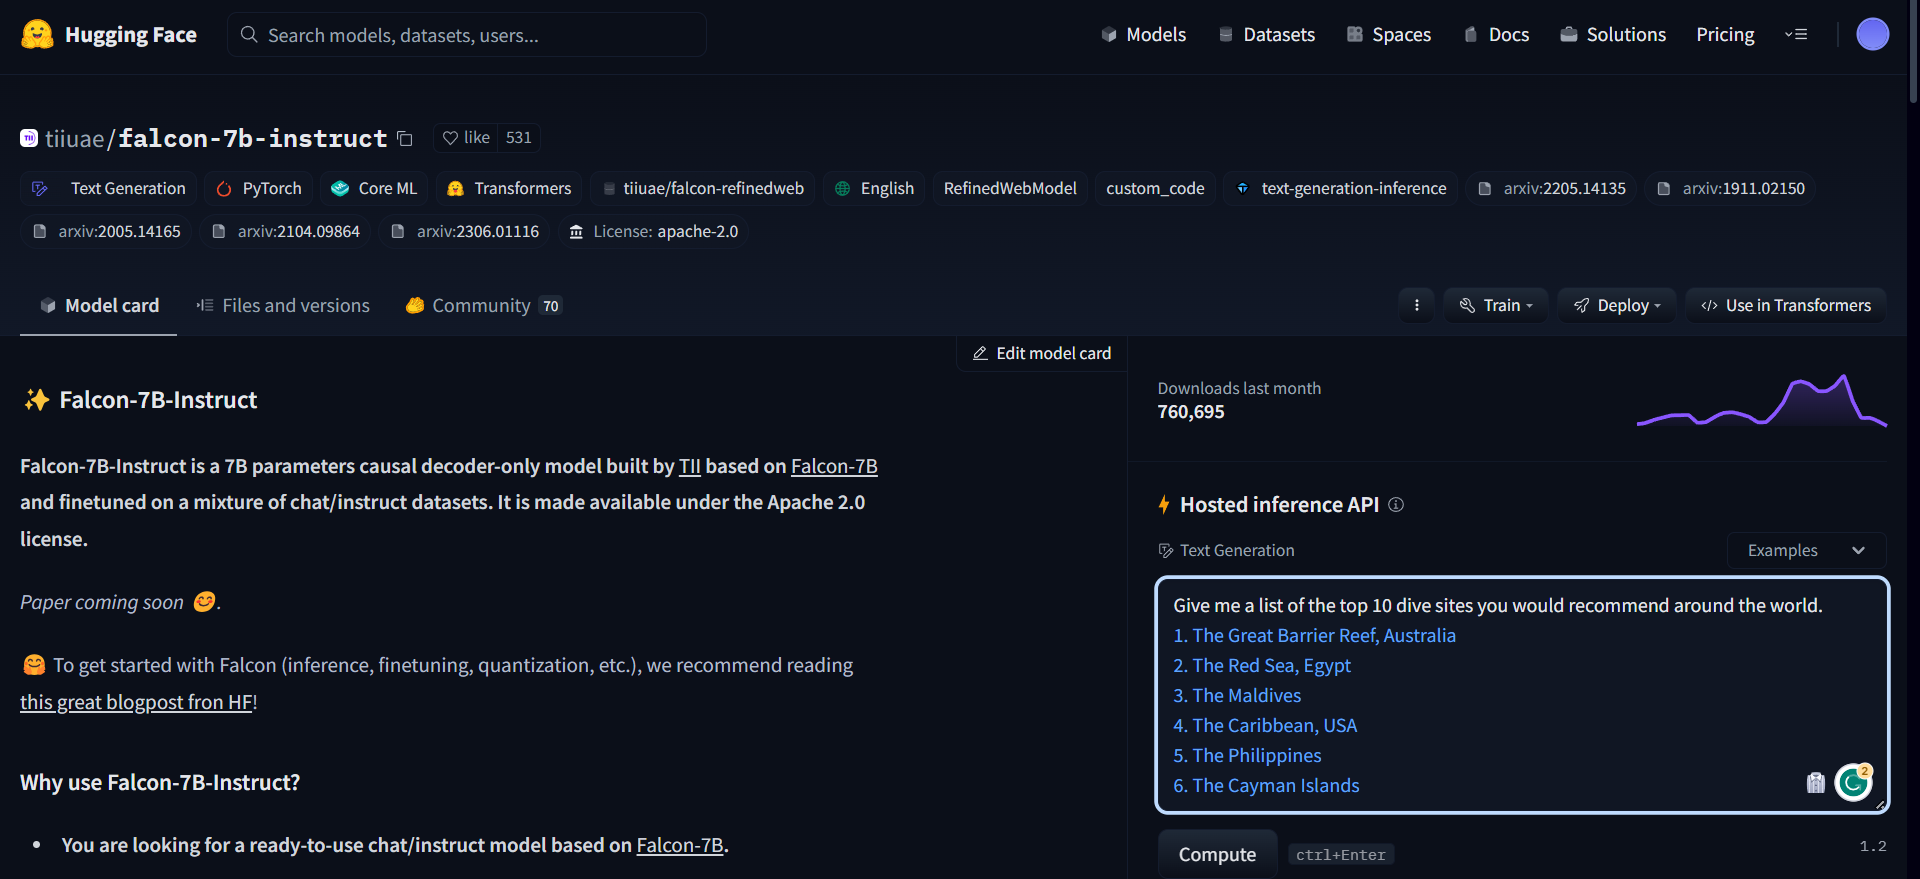

As can be seen above this model is very big (7 billion parameters) and therefore you need a high end GPU to run it. Google colab or Amazon EC2 are recommended for this notebook. I will be using Google colab. Before moving forward remember to change the notebook runtime to use the GPU

In [11]:
# !pip install transformers
# !pip install einops
# !pip install accelerate

### Simple model

In [12]:
from transformers import AutoTokenizer, pipeline
import torch

model = "tiiuae/falcon-7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)
newline_token = tokenizer.encode("\n")[0]
my_name = "Nikhil"
your_name = "AI"
dialog = []

while True:
    user_input = input("> ")
    dialog.append(f"{my_name}: {user_input}")
    prompt = "\n".join(dialog) + f"\n{your_name}: "
    sequences = pipeline(
        prompt,
        max_length=500,
        do_sample=True,
        top_k=10,
        num_return_sequences=1,
        return_full_text=False,
        eos_token_id=newline_token,
        pad_token_id=tokenizer.eos_token_id,
    )
    print(sequences[0]['generated_text'])
    dialog.append("Bob: "+sequences[0]['generated_text'])

ImportError: ignored

![]()

### Tuning the prompt to get useful outputs.

In [13]:
from transformers import AutoTokenizer, pipeline
import torch

model = "tiiuae/falcon-7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)
newline_token = tokenizer.encode("\n")[0]
my_name = "Nikhil"
your_name = "AI"
dialog = ["AI is a professor of Astrophysics."]

while True:
    user_input = input("> ")
    dialog.append(f"{my_name}: {user_input}")
    prompt = "\n".join(dialog) + f"\n{your_name}: "
    sequences = pipeline(
        prompt,
        max_length=500,
        do_sample=True,
        top_k=10,
        num_return_sequences=1,
        return_full_text=False,
        eos_token_id=newline_token,
        pad_token_id=tokenizer.eos_token_id,
    )
    print(sequences[0]['generated_text'])
    dialog.append("Bob: "+sequences[0]['generated_text'])

ImportError: ignored

## Summary and further readings

In this notebook, we saw
- How to create a chatbot using a large language model from the Hugging Face library.
- How to find such models in Hugging Face
- How to use the models using the transformers library, and build a chatbot

Below is a paper that may help you understand better about the instruction following model:

[Ouyang et al, Training language models to follow instructions with human feedback (2022)](https://arxiv.org/pdf/2203.02155.pdf)